In [1]:
from tensor import viz_tensor, model
from tensorflow.examples.tutorials.mnist import input_data
from svm import load_mnist, fit, predict, accuracy, viz_svm

In [2]:
# import data
fashion_mnist = input_data.read_data_sets('../data', one_hot=True)

# shapes of training set
print('Training set (images) shape: {shape}'.format(shape=fashion_mnist.train.images.shape))
print('Training set (labels) shape: {shape}'.format(shape=fashion_mnist.train.labels.shape))

# shapes of test set
print('Test set (images) shape: {shape}'.format(shape=fashion_mnist.test.images.shape))
print('Test set (labels) shape: {shape}'.format(shape=fashion_mnist.test.labels.shape))

Extracting ../data\train-images-idx3-ubyte.gz
Extracting ../data\train-labels-idx1-ubyte.gz
Extracting ../data\t10k-images-idx3-ubyte.gz
Extracting ../data\t10k-labels-idx1-ubyte.gz
Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [3]:
# image labels
labels = {
    0: 't-shirt',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'ankle-boot'
}

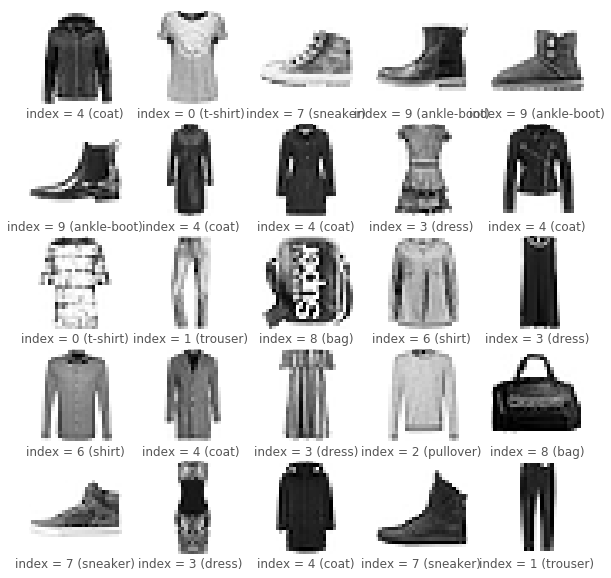

In [4]:
# visualize train sample
viz_tensor(range(25), fashion_mnist, labels)

In [5]:
# generate neural network
train = fashion_mnist.train
test = fashion_mnist.test

model(train, test, labels, learning_rate=0.0005)

IndentationError: unexpected indent (<ipython-input-5-41e0defb5a22>, line 5)

In [ ]:
# load svm data
train = load_mnist('../data/')
test = load_mnist('../data/', kind='t10k')

# shapes of training set
print('Training set (images) shape: {shape}'.format(shape=train[0].shape))
print('Training set (labels) shape: {shape}'.format(shape=train[1].shape))

# shapes of test set
print('Test set (images) shape: {shape}'.format(shape=test[0].shape))
print('Test set (labels) shape: {shape}'.format(shape=test[1].shape))

In [ ]:
# train + predict with svm
model = fit(train)
prediction = predict(model, test)

In [ ]:
# determine svm accuracy
predicted_labels = accuracy(model, test, prediction)
viz_tensor(labels, test, predicted_labels)